# Compare the cost of the same medical procedure at over 2,000 hospitals across the country in US

The histogram to the right displays the average cost of chest pain treatment for over 2,000 hospitals across the United States. As you work your way through this lesson, you will fill in the blanks for the following statement about this histogram:

This histogram displays the distribution of chest pain cost for over 2,000 hospitals across the United States. The average and median costs are $?????????? and $??????????, respectively. Given that the data is ??????????modal, with one local maximum and a ??????????-skew, the fact that the average is ?????????? than the median, matches our expectation.

The range of costs is very large, $??????????, with the smallest cost equal to $?????????? and the largest cost equal to $??????????. There is one hospital, ??????????, that charges far more than the rest at $??????????


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [175]:
cp = pd.read_csv('cp.csv')

In [176]:
cp.shape

(2230, 13)

In [177]:
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', None)

In [178]:
cp.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,80531,313 - CHEST PAIN,220108,MILTON HOSPITAL INC,199 REEDSDALE ROAD,MILTON,MA,2186,MA - Boston,43,6760.53,3547.00,2633.04
1,82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAM...,1108 ROSS CLARK ...,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38
2,82206,313 - CHEST PAIN,10006,ELIZA COFFEE MEM...,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,13,20241.84,3849.76,1704.53
3,82207,313 - CHEST PAIN,10007,MIZELL MEMORIAL ...,702 N MAIN ST,OPP,AL,36467,AL - Dothan,34,6417.20,2808.08,1872.38
4,82208,313 - CHEST PAIN,10011,ST VINCENT'S EAST,50 MEDICAL PARK ...,BIRMINGHAM,AL,35235,AL - Birmingham,33,13311.78,2997.00,2113.84


In [179]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            2230 non-null   int64  
 1   DRG Definition                        2230 non-null   object 
 2   Provider Id                           2230 non-null   int64  
 3   Provider Name                         2230 non-null   object 
 4   Provider Street Address               2230 non-null   object 
 5   Provider City                         2230 non-null   object 
 6   Provider State                        2230 non-null   object 
 7   Provider Zip Code                     2230 non-null   int64  
 8   Hospital Referral Region Description  2230 non-null   object 
 9    Total Discharges                     2230 non-null   int64  
 10   Average Covered Charges              2230 non-null   float64
 11   Average Total Pa

In [180]:
len(cp)

2230

In [181]:
 cp['Provider Street Address'].head()

0     199 REEDSDALE ROAD
1    1108 ROSS CLARK ...
2     205 MARENGO STREET
3          702 N MAIN ST
4    50 MEDICAL PARK ...
Name: Provider Street Address, dtype: object

In [182]:
cp.columns

Index(['Unnamed: 0', 'DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [163]:
avg_cover_charge = cp[' Average Covered Charges ']

In [164]:
avg_cover_charge.head()

0     6760.53
1    19540.55
2    20241.84
3     6417.20
4    13311.78
Name:  Average Covered Charges , dtype: float64

In [165]:
mean_cp = np.mean(avg_cover_charge)
mean_cp

16948.320991031364

In [166]:
median_cp = np.median(avg_cover_charge)
median_cp

14659.6

In [167]:
cp_min = np.min(avg_cover_charge)
cp_min

2459.4

In [168]:
cp_max = np.max(avg_cover_charge)
cp_max

81083.0

In [169]:
hospital_cost_max = cp[cp[' Average Covered Charges '] == 81083.0]
hospital_cost_max

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
1272,83476,313 - CHEST PAIN,310025,BAYONNE HOSPITAL...,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,15,81083.0,3817.8,2823.6


In [170]:
range = cp_max - cp_min
range

78623.6

In [171]:
mode_cp = stats.mode(avg_cover_charge)
mode_cp

ModeResult(mode=array([7282.72]), count=array([2]))

In [172]:
mode_cp[0]

array([7282.72])

In [173]:
np.std(avg_cover_charge)

9058.048244830108

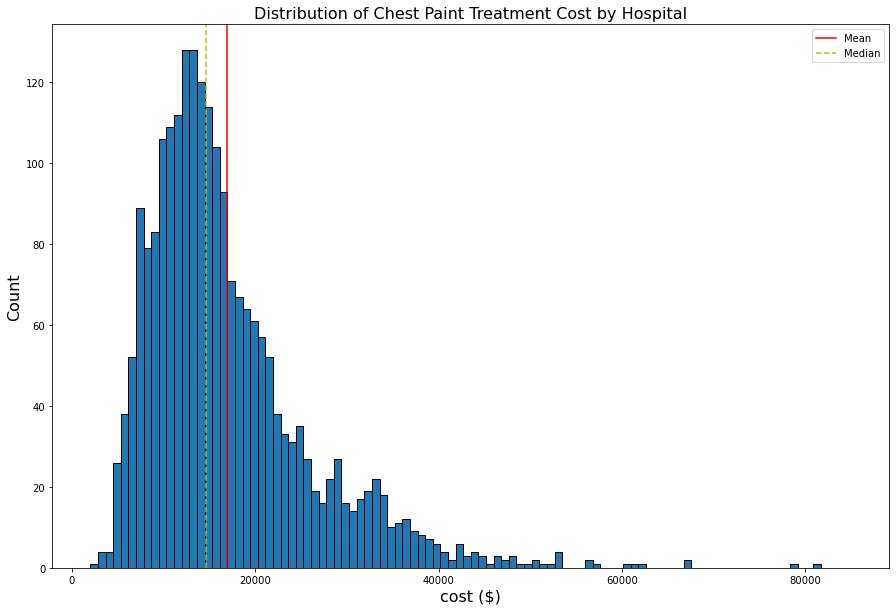

In [133]:
plt.figure(figsize=(15, 10))
plt.hist(avg_cover_charge, range=(2000, 85000), bins=100, edgecolor='black')
plt.title('Distribution of Chest Paint Treatment Cost by Hospital', fontsize=16)
plt.xlabel('cost ($)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(mean_cp, color='r', linestyle='solid', label='Mean')
plt.axvline(median_cp, color='y', linestyle='--', label='Median')
plt.legend()
plt.show()

The histogram displays the average cost of chest pain treatment for over 2,000 hospitals across the United States. 

This histogram displays the distribution of chest pain cost for over 2,000 hospitals across the United States. 
The average and median costs are $16,948 and $14,659, respectively. 
Given that the data is unimodal, with one local maximum and a right-skew, the fact that the average is greater than the median, matches our expectation.

The range of costs is very large, $78,623, with the smallest cost equal to $2,459 and the largest cost equal to $81,083. 
There is one hospital, Bayonne Hospital Center, that charges far more than the rest at $81,083